# 3. logistic regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
rcParams['figure.figsize'] = (7, 7)
font = {'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
from IPython.core.display import HTML
css_file = '../my.css'
HTML(open(css_file, "r").read())

A special type of non-linear regression is logistic regression and is particularly suitable for solving classification tasks where the target is **categorical**.

Let's open a data set in which the target $y$ can have two values only: 0 or 1. 
In classification we say that each data point belongs either to class 0 or to class 1. 

          X  y
0 -3.755938  0
1 -2.948434  0
2 -3.367091  0
3  1.890244  1
4 -4.770407  0


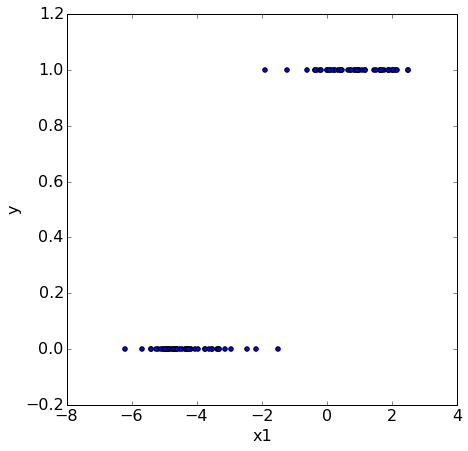

In [2]:
data = pd.read_csv("logistic.csv",sep=" ")
print data.head()
plt.scatter(data['X'],data['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

How does classification differ from regression? Afther all we could just try to fit a linear model

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1$$

to the data. This would compute a linear function $f(x,\theta)$ that shows the linear relation between $x_1$ and $y$.
We could then apply a **threshold** to map the output of $f(x,\theta)$ onto class 0 or 1. For instance $y=1$ if $f(x) \geq 0.5$ and $y=0$ otherwise:

[ 0.17234758]


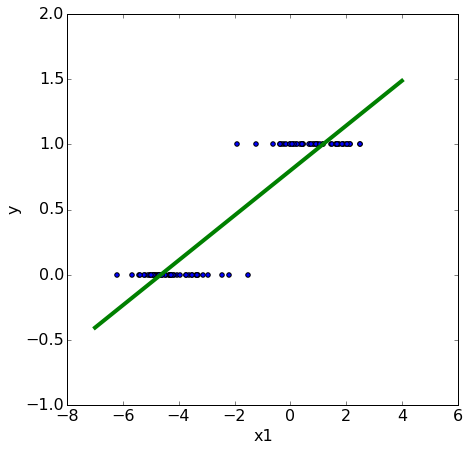

R-squared = 0.883879


In [3]:
from sklearn.linear_model import LinearRegression

X = data['X'].values[:,np.newaxis]
y = data['y'].values

model = LinearRegression(fit_intercept=True)

model.fit(X, y)
print model.coef_

x_plot = np.linspace(-7, 4, 100)
X_plot = x_plot[:, np.newaxis]
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot,lw=4,color='green')
plt.scatter(X,y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

from sklearn import metrics

print "R-squared = %f" % metrics.r2_score(y,model.predict(X))

We can see that with $R^2=0.88$ the linear fit seems to work quite well on this data set. Although judging from the plot we have to admit it doesn't look right. We can obtain a much better fit by using the **logistic function** $g(z)$ as a model for our data. This model is formulized as

$$ f(x,\theta)=g(\theta_0 + \theta_1x_1)$$

with

$$g(z)=\frac{1}{1+e^{-z}}.$$

Since we assume the data to be linearly separable instead to linearly related we have to also adapt the cost function $J(\theta)$ accordingly. The cost for the logistic regression learning algorithm is 

$$J(\theta)=-[\frac{1}{n}\sum\limits_{i=1}^ny^{(i)}log(f(x^{(i)},\theta)+(1-y^{(i)})log(1- f(x^{(i)},\theta))].$$

We know that $y^{(i)}$ is either 0 or 1. If $y^{(i)}=1$ then the cost function $J(\theta)$ is incremented by

$-log(f(x^{(i)},\theta)).$

Similarly, if $y^{(i)}=0$ then the cost function $J(\theta)$ is incremented by

$-log(1- f(x^{(i)},\theta)).$

To understand this we can plot these increments as a function of $f(x,\theta)$:

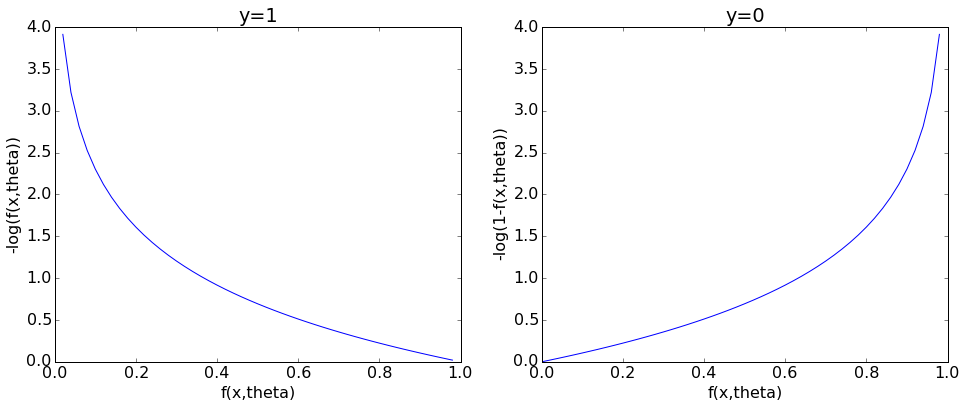

In [4]:
a = np.arange(0, 1, .02)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('y=1')
plt.plot(a,-1*np.log(a))
plt.xlabel('f(x,theta)')
plt.ylabel('-log(f(x,theta))')
plt.subplot(1,2,2)
plt.title('y=0')
plt.plot(a,-1*np.log(1-a))
plt.xlabel('f(x,theta)')
plt.ylabel('-log(1-f(x,theta))')
plt.show()

The plot on the left shows the increment when $y=1$. In this case if $f(x,\theta)$ is close to 1 as well then the increment should be small: the closer to 1 the smaller the increment. I instead $f(x,\theta)$ is close to 0 then the increment should be large: the closer to 0 the larger the increment. We can see that the increment shown in the plot on the left does indead satisfy these criteria.

The plot on the right shows the increment when $y=0$. In this case if $f(x,\theta)$ is close to 0 as well then the increment should be small: the closer to 0 the smaller the increment. I instead $f(x,\theta)$ is close to 1 then the increment should be large: the closer to 1 the larger the increment. We can see that the increment shown in the plot on the right also satisfies these criteria.

We can use the gradient descent optimization algorithm to find the optimal values for $\theta$ given a training set. Similarly to linear regression the increments or decrements in each iteration are computed as:

$$\theta_0:=\theta_0-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_0^{(i)}$$

$$\theta_1:=\theta_1-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_1^{(i)}$$

with $\alpha$ again the learning rate that controls the convergence of the gradient descent iterations.

Whe use the scikit-learn module *LogisticRegression* to compute the optimal logistic function for our data to obtain a much better fit:

In [5]:
from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression(C=1,penalty='l2',tol=0.01,fit_intercept=True)
model.fit(X,y)

print model.coef_
print model.intercept_

print "R-squared = %f" % metrics.r2_score(y,model.predict_proba(X)[:,1])

[[ 1.64542712]]
[ 2.19529335]
R-squared = 0.950762


Now  $R^2=0.95$.

When we plot this logistic function we can see why the fit is much better. Again we can apply a threshold to map the output of $f(x)$ onto a class.

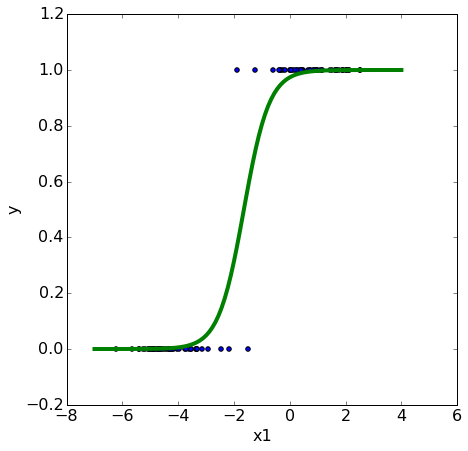

In [6]:
def logistic(theta0,theta1,x):
    return 1/(1+(exp(-1*theta0*(x+theta1))))

tmp = logistic(model.intercept_,model.coef_[0],x_plot)

plt.plot(x_plot,logistic(model.intercept_,model.coef_[0],x_plot),lw=4,color='green')
plt.xlabel('x1')
plt.ylabel('y')
plt.scatter(X,y)
plt.show()

When we have $m$ dependent variables in our data set the cost function for logistic regression becomes

$$f(x,\theta)=g(\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m) = g(\theta^{\prime} x)$$

and the updates during gradient descent are computed as

$$\theta_j:=\theta_j-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_j^{(i)}.$$

Let's take a look at an example for $m=2$. First we create some python data structures that will help us visualizing the model learned by logistic regression.

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

h = 0.2

def create_heatmap(X):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    return np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

def plot_decision_boundary(clf,X,y):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])   
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

Now we create an artificial two-class classification data set with 100 samples and fit a logistic model to this data. We compute the accuracy of the model on the data and plot the decision boundary represented by the fitted model:

0.84


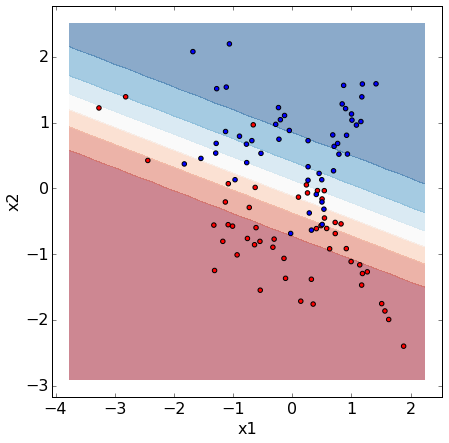

In [9]:
import sklearn.datasets as ds
from sklearn.preprocessing import StandardScaler

(X,Y)=ds.make_classification(n_samples=100,n_features=2,n_redundant=0,random_state=8)
X = StandardScaler().fit_transform(X)

(xx,yy) = create_heatmap(X)

model = LogisticRegression()
model.fit(X,Y)
score = model.score(X, Y)
print score

plot_decision_boundary(model,X,Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The red data points were labeled 0 and the blue points as 1. The color gradient runs from 0 (red) to 1 (blue) and represents the fitted model. We can now see more clearly how logistic regression **generalizes** the training points into two classes indicated by the red and the blue spaces. The model thus allows us to predict the class of future samples.

As with linear regression we can transform the data set using a polynomial function such that we can find non-linear class separations with the logistic regression algorithm:

0.85


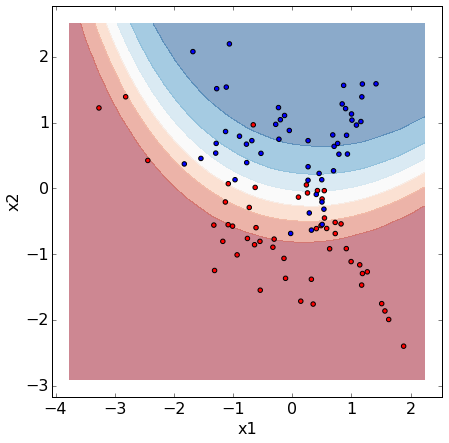

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

clf = LogisticRegression()
polynomial_features = PolynomialFeatures(degree=2)
model = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", clf)])

model.fit(X,Y)
score = model.score(X, Y)
print score

plot_decision_boundary(model,X,Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Note how the accuracy of the non-linear model is slightly higher.


**Multiclass** or **multinomial** classification is the problem of classifying instances into one of the more than two classes. Logistic regression computes **binary** classification models that can only separate two classes. Most machine learning classification learning algorithms compute binary classification models, but there exist also learning algorithms that can compute multiclass models.

Many methods exist to combine binary classification models to produce a multiclass model. Here we will describe two popular ones: **one-against-all** and **one-against-one**.

Suppose we have a data set with $H$ classes. The one-against-all (or one-against-rest) method involves training a single classification model for each class $h_i$, with the samples for $h_i$ as positive samples and all other samples as negative samples. This method requires the binary classification model to compute a real-valued confidence score for its decision, rather than just a class label. Discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample. When a test point is presented each classification model is applied and the class $h_i$ associated with the model that computes the highest confidence is the predicted class for the test point. 

The one-against-one method involves training

$$\frac{H(H-1)}{2}$$

binary classification models where each model us trained on the samples of a pair of classes from the original training set, and must learn to distinguish these two classes. When a test point is presented each classification model is applied and the class that got the highest number of positive predictions gets predicted by the combined classifier.



<strong>Excersises</strong>

- Can you find a better fit for the this last data set we created?

